#  Model Results

In [1]:
from shared import capture_df, frame
from model import InspectorLestrade

df = capture_df()

Using TensorFlow backend.


## Model v6

In [2]:
v6 = InspectorLestrade(6)


Found previously saved v6

Using InspectorLestrade v6

Loaded v6-1e1-linear-dense-lm-2+3x3-2x2-final-dense-
norm.34-27.78.hdf5
  {'val_loss': 27.78, 'step': 34, 'model': 6}


/home/rcdilorenzo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Prediction - point: (-1.8184306621551514, -8.124978065490723), likelihood: 100.0%
Actual: (-2.9021214776599997, -10.6286263134)
Distance: 2.73cm


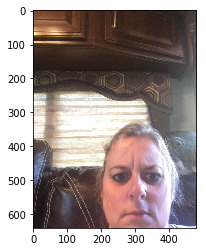

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def prediction_vs_actual(model, row, show_image=False):
    plt.imshow(frame(row))
    (x_hat, y_hat, _l) = model.predict(frame(row))
    
    x = row.at['dotInfo.XCam']
    y = row.at['dotInfo.YCam']
    print('Actual: ({}, {})'.format(x, y))
    
    print('Distance: {0:.2f}cm'.format(np.sqrt(np.square(x_hat - x) + np.square(y_hat - y))))

prediction_vs_actual(v6, df[df.Dataset == 'test'].iloc[100], show_image=True)

In [4]:
v6.evaluate(workers=30)

7035/7035 [==============================] - 695s 99ms/step


29.54197057493805

## Model v10

In [4]:
v10 = InspectorLestrade(10, download_allowed=True)


Found previously saved v10

Using InspectorLestrade v10

Loaded v10-2incep-dense-custom-act.01-63.85.hdf5
  {'val_loss':
63.85, 'step': 1, 'model': 10}


/home/rcdilorenzo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Prediction - point: (4.332937545259787e-22, 4.291316991464837e-22), likelihood: 100.0%
Actual: (-2.9021214776599997, -10.6286263134)
Distance: 11.02cm
7035/7035 [==============================] - 676s 96ms/step


71.81122940204268

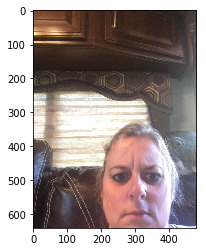

In [5]:
prediction_vs_actual(v10, df[df.Dataset == 'test'].iloc[100])

v10.evaluate(workers=40)

## Model v5


Found previously saved v5

Using InspectorLestrade v5

Loaded v5-2+3x3-2x2-final-dense-norm-layers.01-76.06.hdf5
{'val_loss': 76.06, 'step': 1, 'model': 5}


/home/rcdilorenzo/anaconda3/envs/tensorflow/lib/python3.6/site-packages/torch/nn/functional.py:1890: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


Prediction - point: (8.705491065979004, -8.0676908493042), likelihood: 100.0%
Actual: (-2.9021214776599997, -10.6286263134)
Distance: 11.89cm
7035/7035 [==============================] - 677s 96ms/step


84.735018728524

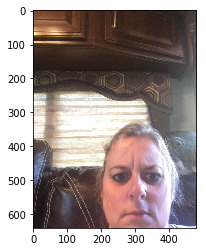

In [8]:
v5 = InspectorLestrade(5)

prediction_vs_actual(v5, df[df.Dataset == 'test'].iloc[100])

v5.evaluate(workers=40)